#### This is for the exercises for boosting related algorithm

In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, mean_absolute_error

# classifiers
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [83]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=8,
                          n_redundant=3, n_repeated=2, random_state=111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state = 111)

#### single tree

In [84]:
decision_tree = DecisionTreeClassifier(random_state=111)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_pred_prob = decision_tree.predict_proba(X_test)

# evaluation
decision_tree_accuracy = accuracy_score(y_pred, y_test)
decision_tree_log_loss = log_loss(y_test, y_pred)

print("==Decision Tree==")
print("Accuracy: {0:.2f}".format(decision_tree_accuracy))
print("Log loss: {0:.2f}".format(decision_tree_log_loss))
print("Number of nodes created: {}".format(decision_tree.tree_.node_count))

# view more details
print("True labels:", y_test[:15,])
print("Pred labels:", y_pred[:15,])
print("Pred_Probility\n", y_pred_prob[:5,])

==Decision Tree==
Accuracy: 0.81
Log loss: 6.39
Number of nodes created: 151
True labels: [1 0 0 0 1 0 1 0 0 1 0 1 1 0 0]
Pred labels: [1 0 0 0 1 1 1 0 0 1 0 0 0 1 1]
Pred_Probility
 [[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]


#### Visualize the tree
the tree is quite big and bushy

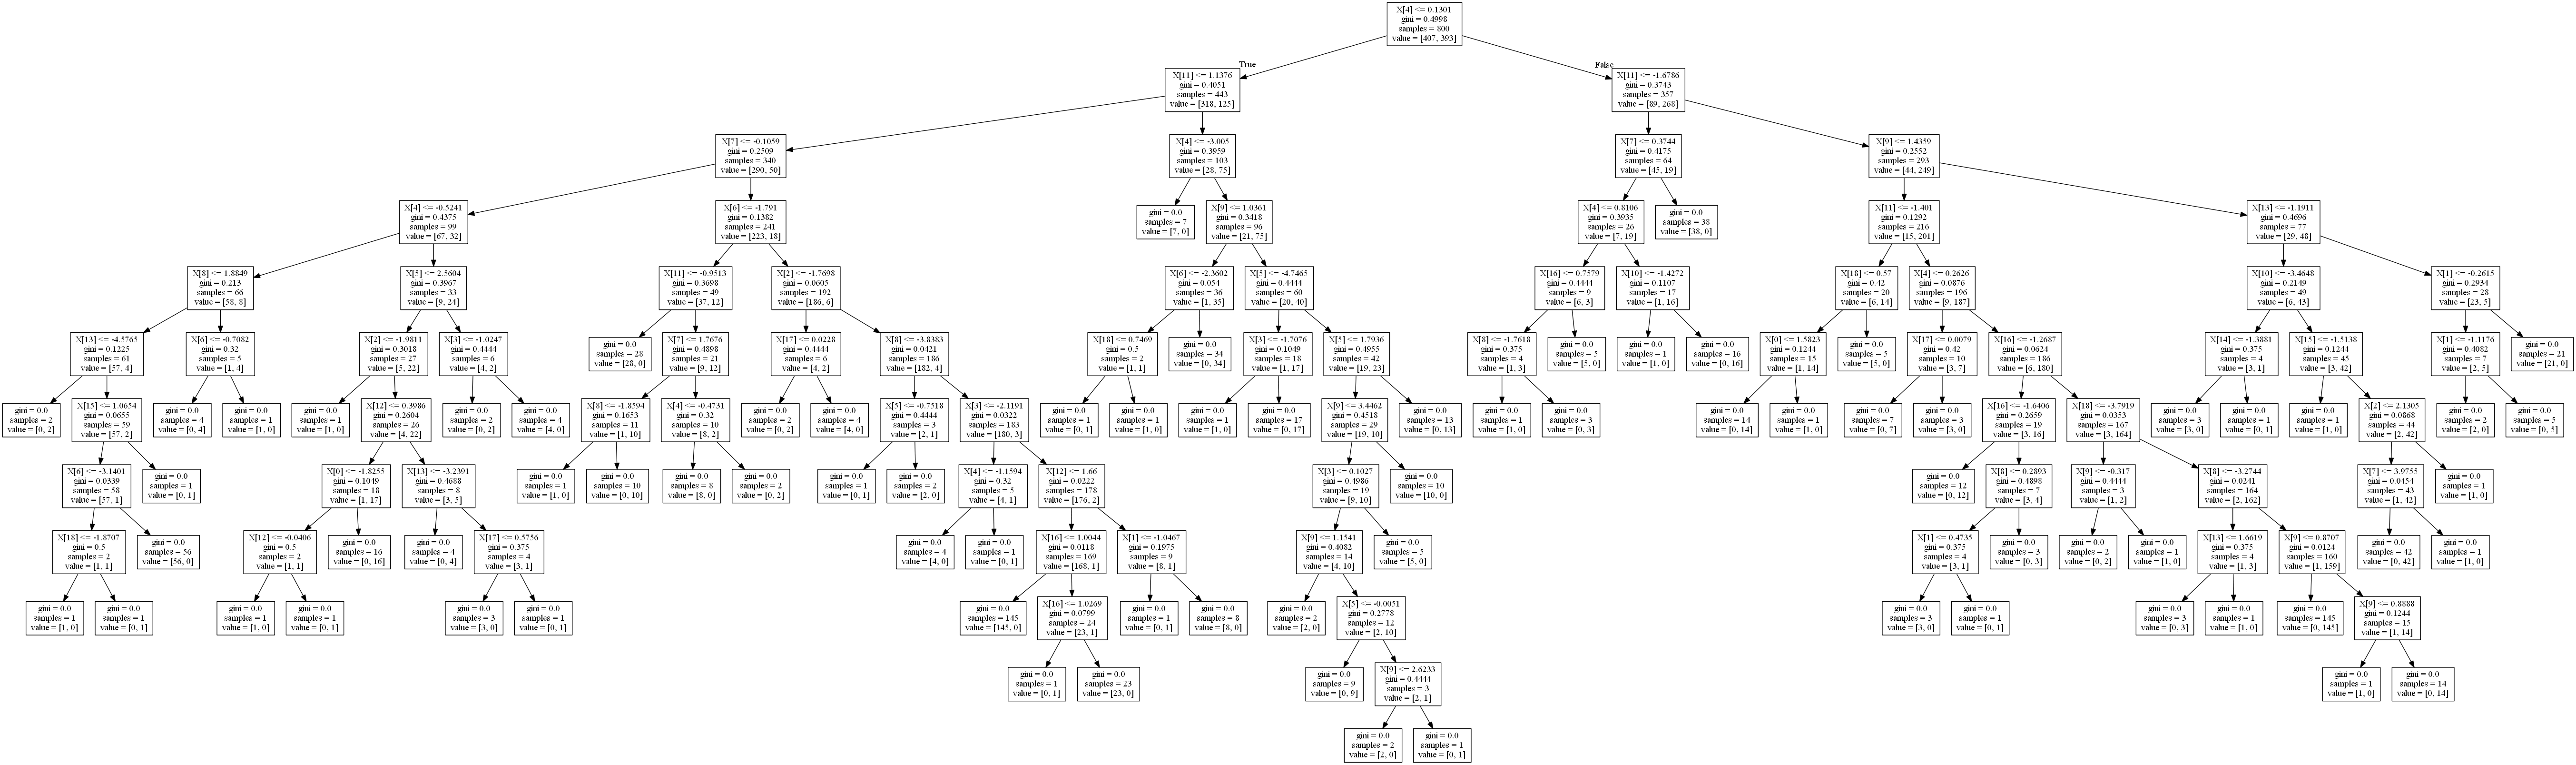

In [85]:
from IPython.display import Image
import subprocess

dt_viz_file = "dt.dot"
dt_png_file = "dt.png"

# create visualization
export_graphviz(decision_tree, out_file=dt_viz_file)

# convert to PNG: if you get exit 1 error, it is because the 'dot' executable is
# not available. Need to install GraphViz package will fix the problem
command = ['dot', '-Tpng', dt_viz_file, '-o', dt_png_file]
subprocess.check_call(command, shell=True)

# Display
Image(filename=dt_png_file)

#### AdaBoost
we are growing decision node up to the first split (which is called _decision stumps_)

In [87]:
adaboost = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        algorithm='SAMME',
        n_estimators=1000,
        random_state=123)

# train classifier and make prediction
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
y_pred_prob = adaboost.predict_proba(X_test)

# evaluation
accuracy = accuracy_score(y_pred, y_test)
logloss = log_loss(y_test, y_pred_prob)

print("Adaboost accuracy: {0:.2f}".format(accuracy))
print("Adaboost log loss: {0:.2f}".format(logloss))

# view details
print("y_test label: ", y_test[:15,])
print("y_pred label: ", y_pred[:15,])
print("y prediction probability: \n", y_pred_prob[:5,])

Adaboost accuracy: 0.89
Adaboost log loss: 0.68
y_test label:  [1 0 0 0 1 0 1 0 0 1 0 1 1 0 0]
y_pred label:  [1 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
y prediction probability: 
 [[ 0.48923518  0.51076482]
 [ 0.49770373  0.50229627]
 [ 0.4965521   0.5034479 ]
 [ 0.49935837  0.50064163]
 [ 0.48928839  0.51071161]]


let's check what the first tree looks like and find out its contribution to the final ensemble

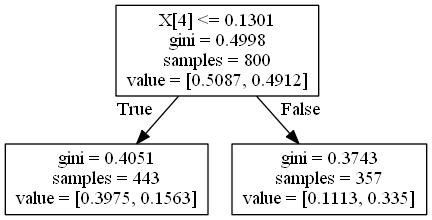

In [88]:
ada_t1 = adaboost.estimators_[0]
ada_t1_viz_file = 'ada_t1.dot'
ada_t1_png_file = 'ada_t1.png'

# create visualization
export_graphviz(ada_t1, out_file=ada_t1_viz_file)

# convert to PNG
command = ['dot', '-Tpng', ada_t1_viz_file, '-o', ada_t1_png_file]
subprocess.check_call(command, shell=True)

# viewing
Image(ada_t1_png_file)

In [89]:
# print first estimator's error
print("Error: {0:.2f}".format(adaboost.estimator_errors_[0]))
print("Tree important: {0:.2f}".format(adaboost.estimator_weights_[0]))

Error: 0.27
Tree important: 1.01


#### Gradient Boosted Tree (GBT)
let's construct a GBT consisting 1000 trees where each successive one will be created with gradient optimization. We will leave most parameters with their default values, specify the max_depth of the tree to 1, and setting warm start for more intelligent computation. 

In [92]:
gbt = GradientBoostingClassifier(max_depth=1, n_estimators=1000, 
                                 warm_start=True, random_state=123)
gbt.fit(X_train, y_train)
gbt_y_pred = gbt.predict(X_test)
gbt_y_pred_prob = gbt.predict_proba(X_test)

# evaluation
accuracy = accuracy_score(y_test, gbt_y_pred)
logloss = log_loss(y_test, gbt_y_pred_prob)
# log_loss = log_loss(y_test, gbt_y_pred_prob)  ===> bad
# note, try not to use the same name for both variable and function. otherwise,
# it will give you TypeError: 'numpy.float64' object is not callable

print("Accuracy: {0:.2f}".format(accuracy))
print("log loss: {0:.2f}".format(logloss))

# view the first several instances
print("y labels:    ", y_test[:15,])
print("y predicted: ", gbt_y_pred[:15,])
print("y predicted probability:\n", gbt_y_pred_prob[:5,])

Accuracy: 0.90
log loss: 0.24
y labels:     [1 0 0 0 1 0 1 0 0 1 0 1 1 0 0]
y predicted:  [1 0 0 0 1 0 1 0 0 1 0 0 0 1 0]
y predicted probability:
 [[ 0.0125176   0.9874824 ]
 [ 0.84405924  0.15594076]
 [ 0.77342065  0.22657935]
 [ 0.96954721  0.03045279]
 [ 0.27227844  0.72772156]]


Here GBT actually use DecisionTreeRegressor classifier as the estimator with *mean_square_error* as criterion. This results a slight different tree. The leaf will contain the predicted value, while the previous ones split points

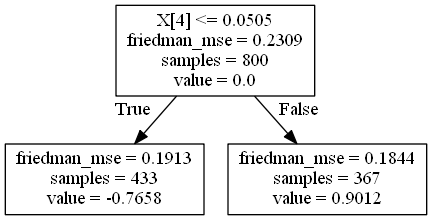

In [94]:
gbt_t1 = gbt.estimators_[2][0]
gbt_dt_dot = 'gbt.dot'
gbt_dt_pnd = 'gbt.png'

# exporting dot file
export_graphviz(gbt_t1, out_file=gbt_dt_dot)

# conversion
command = ['dot', '-Tpng', gbt_dt_dot, '-o', gbt_dt_pnd]
subprocess.check_call(command, shell=True)

Image(gbt_dt_pnd)

### XGBoost
- ***XGBoost handles only numeric variables***
- the dataset used is Agaricus (mushroom classification). All of them has been preprocessed and categorical data have been encoded. Data have been divided into training and test sets
- The target is 0 and 1 for edible and poisonous. So it is a binary classification!
#### details about xgboost
- data need to be stored in _DMatrix_ object, which is designed to handle sparse dataset. It can be populated in the following ways:
  - use libsvm format text file
  - use Numpy 2D array (most popular one)
  - use XGBoost binary buffer file
- here I use the first option! that is using libsvm
  - libsvm only stores non-zero elements in format
  - <label> <feature_a>:<value_a><feature_c>:<value_c>...<feature_x>:<value_x>
  - any missing features indicate that its corresponding value is 0

In [100]:
import xgboost as xgb

In [101]:
# load data
dtrain = xgb.DMatrix('data/agaricus.txt.train')
dtest  = xgb.DMatrix('data/agaricus.txt.test')


AttributeError: 'module' object has no attribute 'DMatrix'